In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile as wav
from scipy.fftpack import fft
%matplotlib inline

In [2]:
#inputs required for (#a) samplingRate, (#b) tau, (#c) numEchoes, and (#d) fullfilename

samplingRate = #a              #number of samples per second
tau = #b                       #in seconds
numEchoes = #c

#filename should be the same as the spreadsheet you're trying to import, with the extension as a separate string
#example: fullfilename = "T2MineralOil" + '.csv'
fullfilename = #d

#before running, delete the first three columns in spreadsheet (we only want the data points in columns D & E). 

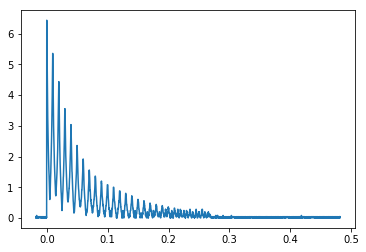

In [3]:
data = np.loadtxt(fullfilename,delimiter = ',')
plt.plot(data[:,0], data[:,1])

In [4]:
#This cell is finding first peak in data set
x2 = len(data)
maxNum1 = max(data[0:x2,1])
count = 0
while data[count,1] != maxNum1:
    count +=1
firstPeak = count
print("First peak is at: " + firstPeak)

90


In [5]:
interval = int(2*tau*samplingRate)
print("Interval is: " + interval)
#If we know tau, then interval = 2*tau*samplingRate

50


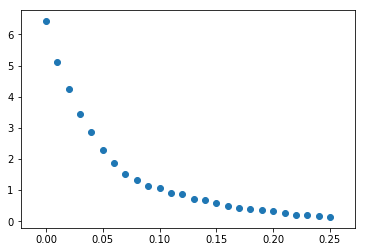

In [6]:
echoPeaks = [data[interval * j + firstPeak, 1] for j in range(numEchoes)]
tEchoes = [data[interval * j + firstPeak, 0] for j in range(numEchoes)]
plt.scatter(tEchoes,echoPeaks)


In [7]:
from scipy.optimize import curve_fit
def fitfunc(x, p1, p2, p3):
  return p1 * np.exp(-x / p2) + p3

#replace variables in p0 below
poptB, pcovB = curve_fit(fitfunc, tEchoes, echoPeaks, p0 = (#Amplitude Estimate, #T2 Estimate, #Offset Estimate))
perrB = np.sqrt(np.diag(pcovB))
print("poptB (p1, p2, p3): ", poptB)
print("perrB (p1, p2, p3): ", perrB)

(array([6.11126986, 0.04716749, 0.23924174]),
 array([0.06735642, 0.00115209, 0.0308906 ]))

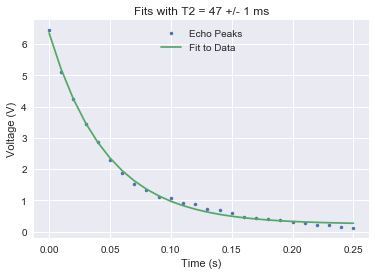

In [14]:
fitData = [fitfunc(tEchoes[j], poptB[0], poptB[1], poptB[2]) for j in range(numEchoes)]
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
#enter p2 output from poptB array above +/- p2 output from perrB array above following the '#'s' in the line below
#as an example: ('Fits with T1 = 68 +/- 1 ms')
plt.title('Fits with T2 = #p2opt +/- #p2err ms')
plt.plot(tEchoes, echoPeaks,'.', label = 'Echo Peaks')
plt.plot(tEchoes, fitData, label = 'Fit to Data')
plt.legend(loc = 'upper center')
plt.show()

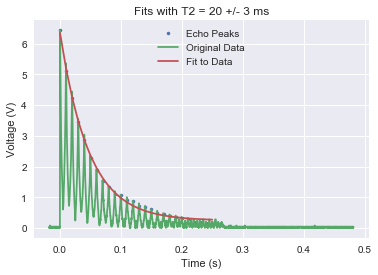

In [15]:
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
#enter p2 output from poptB array above +/- p2 output from perrB array above following the '#'s' in the line below
#as an example: ('Fits with T1 = 68 +/- 1 ms')
plt.title('Fits with T2 = #p2opt +/- #p2err ms')
plt.plot(tEchoes, echoPeaks,'.', label = 'Echo Peaks')
plt.plot(data[:,0], data[:,1], label = 'Original Data')
plt.plot(tEchoes, fitData, label = 'Fit to Data')
plt.legend(loc = 'upper center')
plt.show()